In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist # downloading the dataset of hand written cgharecter of size 28* 28

In [ ]:
# unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

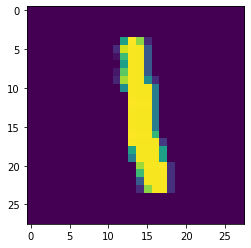

In [ ]:
plt.imshow(x_train[6]) # this is colour image 

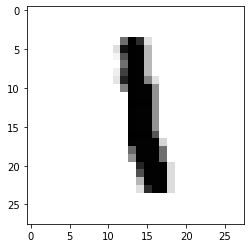

In [ ]:
plt.imshow(x_train[6], cmap = plt.cm.binary) # black and white image

In [ ]:
print(x_train[4]) # before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

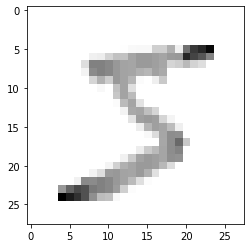

In [ ]:
# here we can see that the values are in between the o and 255
# inorder to normalize it 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [ ]:
print(x_train[4])  # now we can see that all the values are normalized 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[4]) # lets check all other values are normalized or not

9


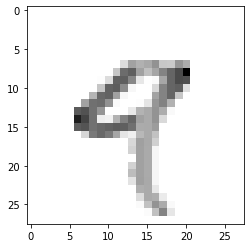

In [ ]:
plt.imshow(x_train[4], cmap = plt.cm.binary) # and yes we did it

Resizing the image to make it sutable for apply Convolution operation

In [ ]:
import numpy as np
image_size = 28
x_trainr = np.array(x_train).reshape(-1,image_size,image_size,1) # Increasing one dimentional for kernal operation
x_testr = np.array(x_test).reshape(-1,image_size,image_size,1) # Increasing one dimentional for kernal operation
print("Traing sample dimention ...", x_trainr.shape)
print("Test sample simention.....", x_testr.shape)

Traing sample dimention ... (60000, 28, 28, 1)
Test sample simention..... (10000, 28, 28, 1)


# Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Creating the Neural Network

model = Sequential()

# First convolution layer 0,1,2,3 (60000, 28,28,1)
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:])) # First layer
model.add(Activation("relu"))  # Activation fundction is to make it non linear. So it is like < 0 ignore, > 0 max one
model.add(MaxPooling2D(pool_size = (2,2))) 

# 2ed convolution layer 
model.add(Conv2D(64,(3,3))) 
model.add(Activation("relu"))  
model.add(MaxPooling2D(pool_size = (2,2))) 

# 3rd convolution layer 
model.add(Conv2D(64,(3,3))) 
model.add(Activation("relu"))  
model.add(MaxPooling2D(pool_size = (2,2))) 

# Fully connected layer # 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer # 2
model.add(Dense(32))
model.add(Activation("relu"))

# Fully connected layer # 3
model.add(Dense(10)) # this must be equal to 10 because we have 10 different classifications
model.add(Activation("softmax"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
print("Total traing sample: ",len(x_trainr))

Total traing sample:  60000


In [ ]:
#model.compile(loss = "sparce_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train, epochs = 12, validation_split = 0.3 )

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1313/1313 [==============================] - 7s 5ms/step - loss: 0.3495 - accuracy: 0.8915 - val_loss: 0.1342 - val_accuracy: 0.9579
Epoch 2/12
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1088 - accuracy: 0.9668 - val_loss: 0.0974 - val_accuracy: 0.9691
Epoch 3/12
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0756 - accuracy: 0.9759 - val_loss: 0.0758 - val_accuracy: 0.9770
Epoch 4/12
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0683 - val_accuracy: 0.9799
Epoch 5/12
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.0565 - val_accuracy: 0.9825
Epoch 6/12
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0670 - val_accuracy: 0.9801
Epoch 7/12
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0645 - val_accuracy: 0.9814
Epo

Evaluating on testing data

In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9847
Test loss on 10,000 test samples 0.06550590693950653
Validation accuracy on 10,000 test samples 0.9847000241279602


In [ ]:
predictions = model.predict([x_testr])

In [ ]:
print(np.argmax(predictions[8]))

5


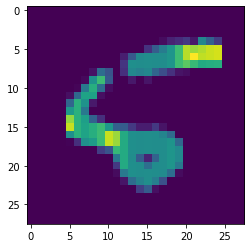

In [ ]:
plt.imshow(x_test[8])

In [ ]:
print(np.argmax(predictions[454]))

9


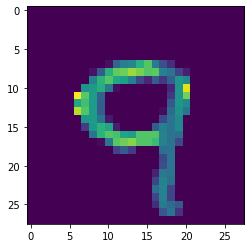

In [ ]:
plt.imshow(x_test[454])

In [ ]:
import cv2

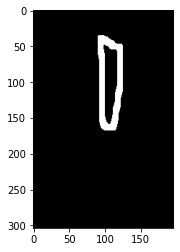

In [ ]:
img = cv2.imread("balu.png")
plt.imshow(img)

In [ ]:
img.shape

(304, 196, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)
print(resized.shape)

(304, 196)
(28, 28)


In [ ]:
newimg = tf.keras.utils.normalize(resized, axis = 1) # 0 to 1 scaling
newimg = np.array(newimg).reshape(-1,image_size,image_size,1)# kernal operation of convolution layer
print(newimg.shape)


(1, 28, 28, 1)


In [ ]:
predictions = model.predict([newimg])

In [ ]:
print(np.argmax(predictions))

4
